In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

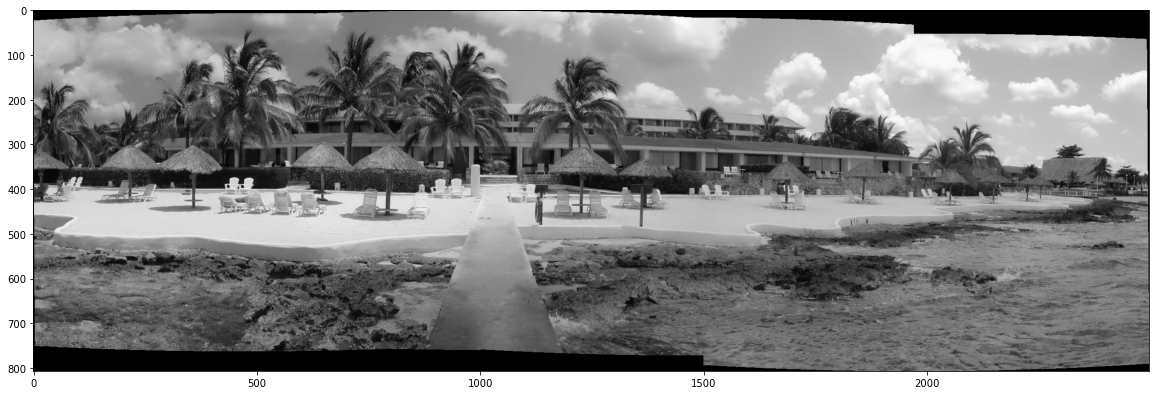

In [17]:
img_names = ['hotel-01.png', 'hotel-02.png', 'hotel-03.png', 'hotel-04.png']

imgs = []
for i, name in enumerate(img_names):
    img = cv2.imread(name)
    imgs.append(img)

stitcher = cv2.Stitcher_create()

status, dst = stitcher.stitch(imgs)

s=0
plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))

In [3]:
def KeypointsMatching(keyPoints_L, keyPoints_R, descriptors_L, descriptors_R):

    bf = cv2.BFMatcher()
    raw_matches = bf.knnMatch(descriptors_L, descriptors_R, k=2)

    matches = []
    for m in raw_matches:
        if len(m) == 2 and m[0].distance < m[1].distance * 0.79:
            matches.append((m[0].trainIdx, m[0].queryIdx))

    if len(matches) >= 4:

        keyPoints_L = np.float32([keyPoints_L[i] for (_, i) in matches])
        keyPoints_R = np.float32([keyPoints_R[i] for (i, _) in matches])

        H, status = cv2.findHomography(keyPoints_L, keyPoints_R, cv2.RANSAC, 4.0)


    return matches, H, status

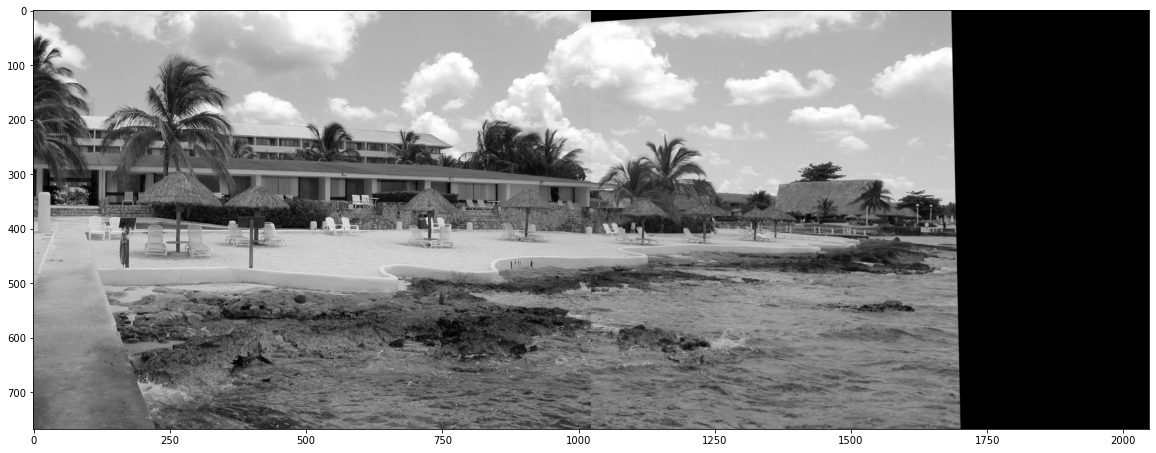

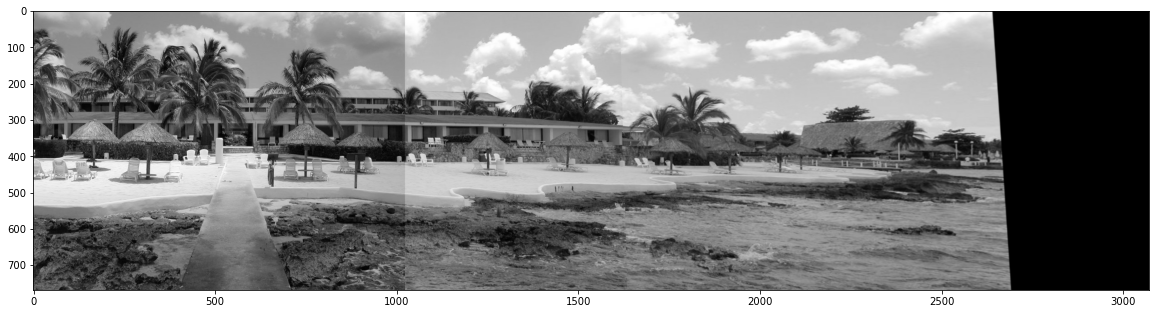

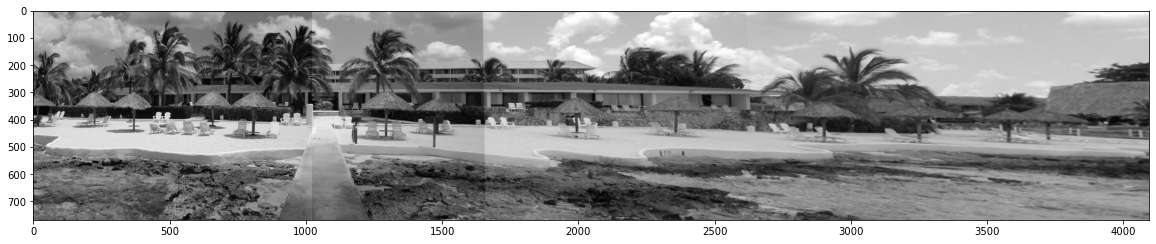

In [18]:
image_1 = cv2.imread('hotel-01.png')
image_2 = cv2.imread('hotel-02.png')
image_3 = cv2.imread('hotel-03.png')
image_4 = cv2.imread('hotel-04.png')

gray_1 = cv2.cvtColor(image_1, cv2.COLOR_BGR2GRAY)
gray_2 = cv2.cvtColor(image_2, cv2.COLOR_BGR2GRAY)
gray_3 = cv2.cvtColor(image_3, cv2.COLOR_BGR2GRAY)
gray_4 = cv2.cvtColor(image_4, cv2.COLOR_BGR2GRAY)

detector = cv2.xfeatures2d.SIFT_create()
keyPoints_1, descriptors_1 = detector.detectAndCompute(gray_1, None)
keyPoints_2, descriptors_2 = detector.detectAndCompute(gray_2, None)
keyPoints_3, descriptors_3 = detector.detectAndCompute(gray_3, None)
keyPoints_4, descriptors_4 = detector.detectAndCompute(gray_4, None)

keyPoints_1 = np.float32([keypoint.pt for keypoint in keyPoints_1])
keyPoints_2 = np.float32([keypoint.pt for keypoint in keyPoints_2])
keyPoints_3 = np.float32([keypoint.pt for keypoint in keyPoints_3])
keyPoints_4 = np.float32([keypoint.pt for keypoint in keyPoints_4])

matches, H, status = KeypointsMatching(keyPoints_1, keyPoints_2, descriptors_1, descriptors_2)

result = cv2.warpPerspective(image_1, H,
                             (image_2.shape[1] + image_2.shape[1], image_1.shape[0]))
result[0:image_2.shape[0], 0:image_2.shape[1]] = image_2

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# (1~2) + 3
keyPoints, descriptors = detector.detectAndCompute(result, None)
keyPoints = np.float32([keypoint.pt for keypoint in keyPoints])

matches, H, status = KeypointsMatching(keyPoints, keyPoints_3, descriptors, descriptors_3)
result = cv2.warpPerspective(result, H,
                            (result.shape[1] + image_3.shape[1], result.shape[0]))
result[0:image_3.shape[0], 0:image_3.shape[1]] = image_3

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

# (1~3) + 4
keyPoints, descriptors = detector.detectAndCompute(result, None)
keyPoints = np.float32([keypoint.pt for keypoint in keyPoints])

matches, H, status = KeypointsMatching(keyPoints, keyPoints_4, descriptors, descriptors_4)
result = cv2.warpPerspective(result, H,
                            (result.shape[1] + image_4.shape[1], result.shape[0]))
result[0:image_4.shape[0], 0:image_4.shape[1]] = image_4

plt.figure(figsize=(20,20))
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))